In [ ]:
!pip install hyppo

In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau
from hyppo.independence import MGC, HHG

## 1

1. Исследуйте зависимость выборок 𝑋 и 𝑌 = 𝑓(𝑋) + 𝑈 с помощью коэффициентов Пирсона, Спирмена, Кенделла, MGC. Шум 𝑈 возьмите независимыми 𝑅[−2, 2] величинами. Рассмотрите шесть случаев: 𝑋 ∼ 𝑅[0,1] или 𝑋 ∼ 𝑅[−10,10],а𝑓(𝑥) = 2𝑥 + 5или𝑓(𝑥) = 𝑥^2 или 𝑓(𝑥) = 𝑥cos𝑥.

In [28]:
# 1

U = np.random.uniform(-2, 2, 500)

func1 = lambda x: 2*x + 5
func2 = lambda x: x ** 2
func3 = lambda x: x * math.cos(x)

x1 = np.random.uniform(0, 1, 500)
x2 = np.random.uniform(-10, 10, 500)

y1_func1_x1 = [func1(x1[i]) + U[i] for i in range(len(U))]
y2_func1_x2 = [func1(x2[i]) + U[i] for i in range(len(U))]
y3_func2_x1 = [func2(x1[i]) + U[i] for i in range(len(U))]
y4_func2_x2 = [func2(x2[i]) + U[i] for i in range(len(U))]
y5_func3_x1 = [func3(x1[i]) + U[i] for i in range(len(U))]
y6_func3_x2 = [func3(x2[i]) + U[i] for i in range(len(U))]

Коэффициент корреляции Пирсона измеряет линейную зависимость между двумя наборами данных. Как и другие коэффициенты корреляции, этот варьируется от -1 до +1, где 0 означает отсутствие корреляции. Корреляции -1 или +1 подразумевают точную линейную зависимость. Положительные корреляции подразумевают, что с увеличением x увеличивается и y. Отрицательные корреляции подразумевают, что с увеличением x уменьшается y.

Эта функция также выполняет проверку нулевой гипотезы о том, что распределения, лежащие в основе выборок, являются некоррелированными и нормально распределенными.

## Пирсон

(0.4636078855669883, 5.19653467623881e-28)


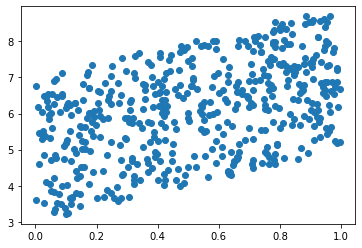

In [29]:
print(pearsonr(x1, y1_func1_x1))
plt.plot(x1, y1_func1_x1, "o")
plt.show()

(0.25367816067524124, 8.789032945545785e-09)


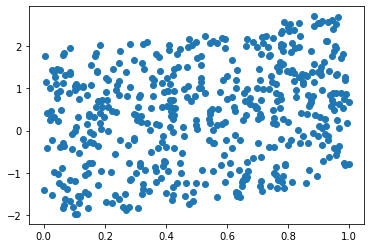

In [30]:
print(pearsonr(x1, y3_func2_x1))
plt.plot(x1, y3_func2_x1, "o")
plt.show()

(0.14719531648578144, 0.0009629015305422422)


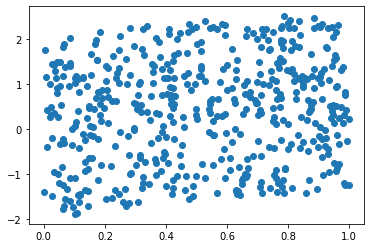

In [31]:
print(pearsonr(x1, y5_func3_x1))
plt.plot(x1, y5_func3_x1, "o")
plt.show()

(0.995462616670789, 0.0)


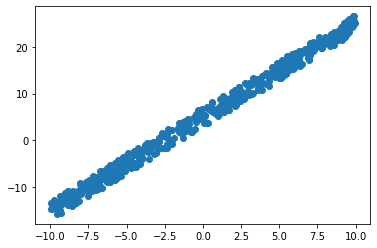

In [32]:
print(pearsonr(x2, y2_func1_x2))
plt.plot(x2, y2_func1_x2, "o")
plt.show()

(0.12031110681805382, 0.007074983145358517)


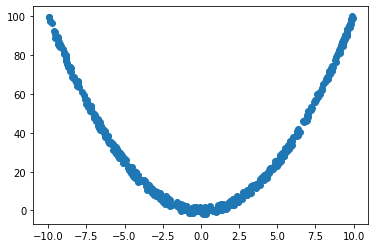

In [33]:
print(pearsonr(x2, y4_func2_x2))
plt.plot(x2, y4_func2_x2, "o")
plt.show()

(-0.24786586013512346, 1.949141073326218e-08)


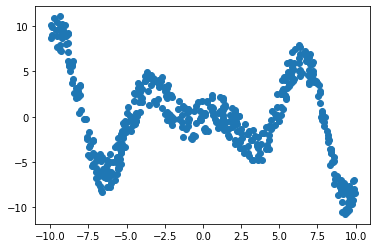

In [34]:
print(pearsonr(x2, y6_func3_x2))
plt.plot(x2, y6_func3_x2, "o")
plt.show()

## Спирман

SpearmanrResult(correlation=0.44828608114432456, pvalue=4.3418059962928796e-26)


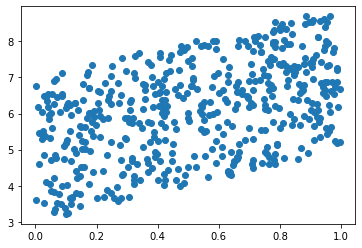

In [35]:
print(spearmanr(x1, y1_func1_x1))
plt.plot(x1, y1_func1_x1, "o")
plt.show()

SpearmanrResult(correlation=0.24327889311557244, pvalue=3.6036747726328326e-08)


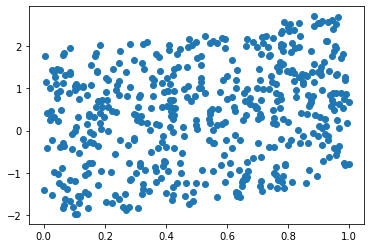

In [36]:
print(spearmanr(x1, y3_func2_x1))
plt.plot(x1, y3_func2_x1, "o")
plt.show()

SpearmanrResult(correlation=0.13613968055872222, pvalue=0.002282538958278816)


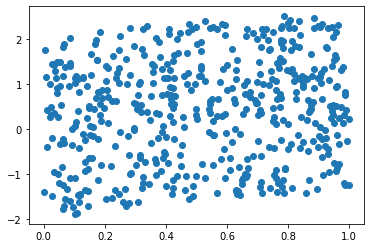

In [37]:
print(spearmanr(x1, y5_func3_x1))
plt.plot(x1, y5_func3_x1, "o")
plt.show()

SpearmanrResult(correlation=0.9950530042120168, pvalue=0.0)


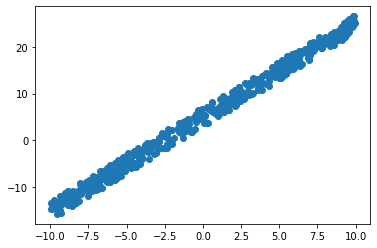

In [38]:
print(spearmanr(x2, y2_func1_x2))
plt.plot(x2, y2_func1_x2, "o")
plt.show()

SpearmanrResult(correlation=0.05590649562598251, pvalue=0.2120476975510298)


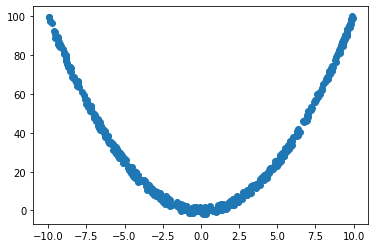

In [39]:
print(spearmanr(x2, y4_func2_x2))
plt.plot(x2, y4_func2_x2, "o")
plt.show()

SpearmanrResult(correlation=-0.17334126936507746, pvalue=9.785174903296319e-05)


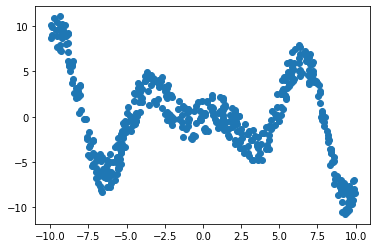

In [40]:
print(spearmanr(x2, y6_func3_x2))
plt.plot(x2, y6_func3_x2, "o")
plt.show()

## Кенделл

Это мера соответствия между двумя рейтингами. Значения, близкие к 1, указывают на сильное согласие, а значения, близкие к -1, указывают на сильное несогласие. Это реализует два варианта тау Кендалла: тау-b (по умолчанию) и тау-с (также известный как тау-с Стюарта). Они отличаются только тем, как они нормализованы, чтобы лежать в диапазоне от -1 до 1; проверки гипотез (их p-значения) идентичны. Исходный тау-а Кендалла не реализуется отдельно, потому что и тау-b, и тау-с сводятся к тау-а при отсутствии связей.

SpearmanrResult(correlation=0.44828608114432456, pvalue=4.3418059962928796e-26)


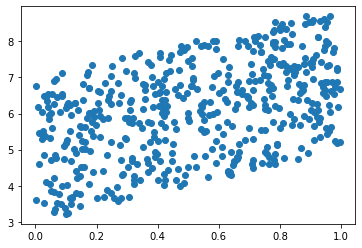

In [41]:
print(spearmanr(x1, y1_func1_x1))
plt.plot(x1, y1_func1_x1, "o")
plt.show()

SpearmanrResult(correlation=0.24327889311557244, pvalue=3.6036747726328326e-08)


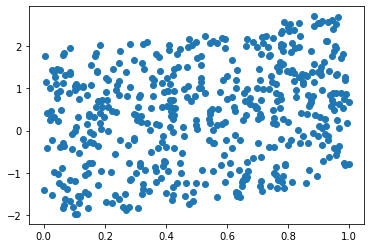

In [42]:
print(spearmanr(x1, y3_func2_x1))
plt.plot(x1, y3_func2_x1, "o")
plt.show()

SpearmanrResult(correlation=0.13613968055872222, pvalue=0.002282538958278816)


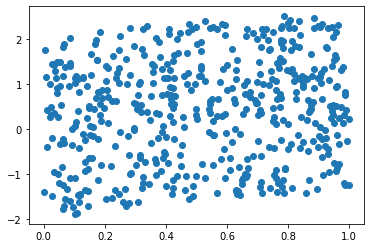

In [43]:
print(spearmanr(x1, y5_func3_x1))
plt.plot(x1, y5_func3_x1, "o")
plt.show()

SpearmanrResult(correlation=0.9950530042120168, pvalue=0.0)


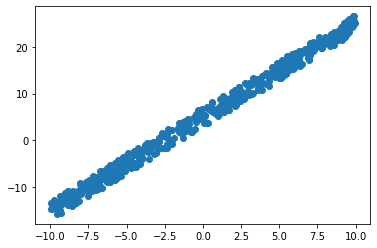

In [44]:
print(spearmanr(x2, y2_func1_x2))
plt.plot(x2, y2_func1_x2, "o")
plt.show()

SpearmanrResult(correlation=0.05590649562598251, pvalue=0.2120476975510298)


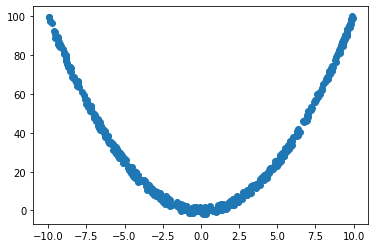

In [45]:
print(spearmanr(x2, y4_func2_x2))
plt.plot(x2, y4_func2_x2, "o")
plt.show()

(-0.24786586013512346, 1.949141073326218e-08)


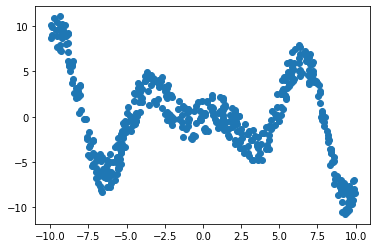

In [46]:
print(pearsonr(x2, y6_func3_x2))
plt.plot(x2, y6_func3_x2, "o")
plt.show()

## MGC

0.17562989575835536 0.000999000999000999


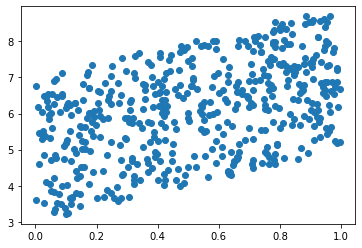

In [47]:
stat, pvalue, _ = MGC().test(np.array(x1), np.array(y1_func1_x1), workers=-1)
print(stat, pvalue)
plt.plot(x1, y1_func1_x1, "o")
plt.show()

0.048505414764622695 0.000999000999000999


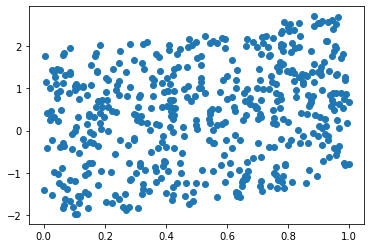

In [48]:
stat, pvalue, _ = MGC().test(np.array(x1), np.array(y3_func2_x1), workers=-1)
print(stat, pvalue)
plt.plot(x1, y3_func2_x1, "o")
plt.show()

0.014245567394814838 0.04295704295704296


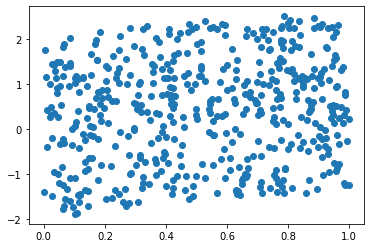

In [49]:
stat, pvalue, _ = MGC().test(np.array(x1), np.array(y5_func3_x1), workers=-1)
print(stat, pvalue)
plt.plot(x1, y5_func3_x1, "o")
plt.show()

0.9890618333019949 0.000999000999000999


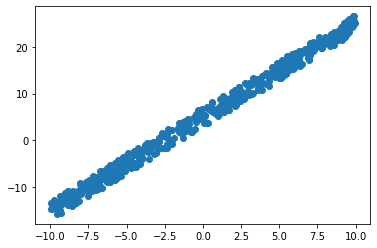

In [50]:
stat, pvalue, _ = MGC().test(np.array(x2), np.array(y2_func1_x2), workers=-1)
print(stat, pvalue)
plt.plot(x2, y2_func1_x2, "o")
plt.show()

0.6301164499881053 0.000999000999000999


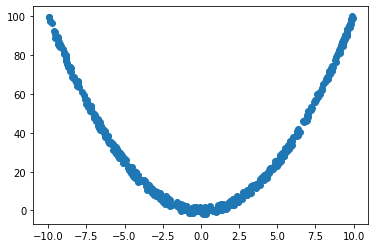

In [51]:
stat, pvalue, _ = MGC().test(np.array(x2), np.array(y4_func2_x2), workers=-1)
print(stat, pvalue)
plt.plot(x2, y4_func2_x2, "o")
plt.show()


0.4349680245570149 0.000999000999000999


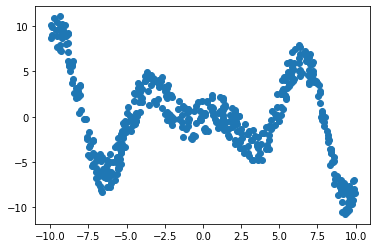

In [52]:
stat, pvalue, _ = MGC().test(np.array(x2), np.array(y6_func3_x2), workers=-1)
print(stat, pvalue)
plt.plot(x2, y6_func3_x2, "o")
plt.show()

# 2

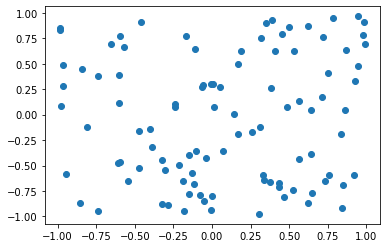

In [53]:
# Без Кендалла (он слишком простой)

x1 = np.random.uniform(-1,1,100)
y1 = np.random.uniform(-1,1,100)

plt.plot(x1, y1, 'o')

63 63


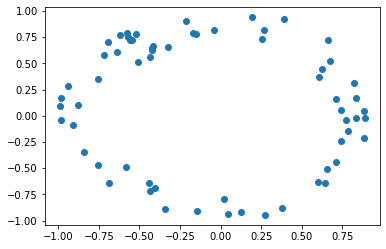

In [54]:
x2 = []
y2 = []

x = np.random.uniform(-1, 1, 150)
y = np.random.uniform(-1, 1, 150)
# plt.plot(x, y, 'o')

for i in range (0, len(x)):
    if (x[i]*x[i] + y[i]*y[i]) > 1/2 and (x[i]*x[i] + y[i]*y[i]) < 1:
        x2.append(x[i])
        y2.append(y[i])
print (len(x2), len(y2))

plt.plot(x2, y2, 'o')

168 168


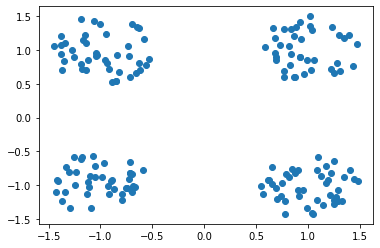

In [55]:
x3 = []
y3 = []

x = np.random.uniform(-1.5, 1.5, 500)
y = np.random.uniform(-1.5, 1.5, 500)
# plt.plot(x, y, 'o')

for i in range (0, len(x)):
    if ((x[i]-1)*(x[i]-1) + (y[i]-1)*(y[i]-1)) < 1/4 or ((x[i]-1)*(x[i]-1) + (y[i]+1)*(y[i]+1)) < 1/4 or ((x[i]+1)*(x[i]+1) + (y[i]-1)*(y[i]-1)) < 1/4 or ((x[i]+1)*(x[i]+1) + (y[i]+1)*(y[i]+1)) < 1/4:
        x3.append(x[i])
        y3.append(y[i])
print (len(x3), len(y3))

plt.plot(x3, y3, 'o')

In [56]:
stat, pvalue, _ = MGC().test(np.array(x1), np.array(y1), workers=-1)
print(stat, pvalue)

stat, pvalue, _ = MGC().test(np.array(x2), np.array(y2), workers=-1)
print(stat, pvalue)

stat, pvalue, _ = MGC().test(np.array(x3), np.array(y3), workers=-1)
print(stat, pvalue)

0.007637496698599613 0.21178821178821178
0.21723873549215528 0.000999000999000999
-0.004383791065678492 0.6433566433566433


In [57]:
stat, pvalue = HHG().test(np.array(x1), np.array(y1))
print(stat, pvalue)

stat, pvalue = HHG().test(np.array(x2), np.array(y2))
print(stat, pvalue)

stat, pvalue = HHG().test(np.array(x3), np.array(y3))
print(stat, pvalue)

13339.507840669517 0.07792207792207792
13018.969218880377 0.000999000999000999
23713.70139050023 0.6423576423576424


## 3

In [58]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [59]:
sample = np.random.exponential(1, size=(100,3))
df1 = pd.DataFrame(sample)
df1.set_axis(['X', 'Y', 'Z'], axis=1, inplace=True)
df1
print(sample.shape)

(100, 3)


In [60]:
matrix = np.array([[2, 0.5, 1], [0.4, -1, 0.4], [0, 0.5, 1]])
uvw = []
for i in range(0,100):
    el = sample[i,:].dot(matrix)
    uvw.append(el)

df = pd.DataFrame(uvw)
df.set_axis(['U', 'V', 'W'], axis=1, inplace=True)
df

,U,V,W
0,1.212991,0.812353,2.498591
1,2.426328,0.490704,2.167891
2,0.721652,0.078090,0.502137
3,0.984310,-0.621372,1.923403
4,0.646745,1.105303,2.212460
...,...,...,...
95,0.752287,-0.419906,0.747113
96,2.713750,0.348990,1.427417
97,4.928301,0.013826,3.289163
98,4.612819,1.486788,3.632243


In [61]:
#frames = [df1, df]
data = result = pd.concat([df1, df], axis=1)
data

,X,Y,Z,U,V,W
0,0.533672,0.364119,1.819272,1.212991,0.812353,2.498591
1,1.114290,0.494367,0.855854,2.426328,0.490704,2.167891
2,0.331996,0.144149,0.112481,0.721652,0.078090,0.502137
3,0.228309,1.319228,1.167402,0.984310,-0.621372,1.923403
4,0.323218,0.000772,1.888934,0.646745,1.105303,2.212460
...,...,...,...,...,...,...
95,0.243900,0.661219,0.238726,0.752287,-0.419906,0.747113
96,1.296088,0.303933,0.009756,2.713750,0.348990,1.427417
97,2.192358,1.358963,0.553221,4.928301,0.013826,3.289163
98,2.251521,0.274444,1.270945,4.612819,1.486788,3.632243


          X         Y         Z         U         V         W
X  1.000000  0.050733 -0.076305  0.984461  0.338414  0.625971
Y  0.050733  1.000000 -0.152864  0.225323 -0.795990  0.157506
Z -0.076305 -0.152864  1.000000 -0.101317  0.560718  0.692184
U  0.984461  0.225323 -0.101317  1.000000  0.190177  0.638354
V  0.338414 -0.795990  0.560718  0.190177  1.000000  0.472381
W  0.625971  0.157506  0.692184  0.638354  0.472381  1.000000


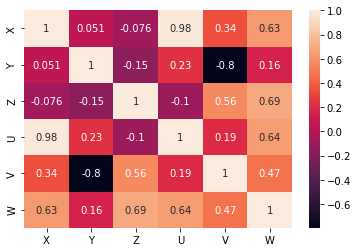

In [62]:
corr_matrix = data.corr()
print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.show()

# 4

In [74]:
x1 = []
x2 = []

with open("babies.txt") as file:
    first_line = file.readline()
    
    for line in file:
        temp = line.strip().split()
        x1.append(float(temp[0]))
        x2.append(float(temp[1]))

Коэффициент корреляции Пирсона
(0.44992001901124123, 0.031230270862916024)


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии euclidean
0.08180234442219494 0.11888111888111888


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии cityblock
0.08180234442219536 0.1108891108891109


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии cosine
0.0 1.0


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии l1
0.08180234442219536 0.13686313686313686


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии l2
0.08180234442219494 0.11788211788211789


/Users/ivanbockov/opt/anaconda3/lib/python3.9/site-packages/hyppo/independence/mgc.py:236: RuntimeWarning: Input x has 1 redundant rows, and input y has 0 redundant rows. MGC Map will be of shape (22, 23).
  warnings.warn(


Коэффициент корреляции MGC при расстоянии manhattan
0.08180234442219536 0.13086913086913088


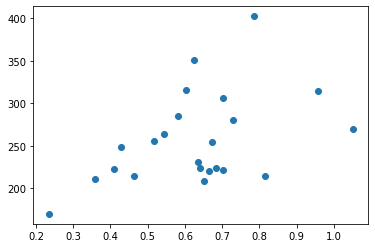

In [75]:
# зависимость x1 и x2

compute_distances = ["euclidean", "cityblock", "cosine", "l1", "l2", "manhattan"]

print(f"Коэффициент корреляции Пирсона")
print(pearsonr(x1, x2))

for i in range(len(compute_distances)):
    stat, pvalue, _ = MGC(compute_distance=compute_distances[i]).test(np.array(x1), np.array(x2), workers=-1)
    print(f"Коэффициент корреляции MGC при расстоянии {compute_distances[i]}")
    print(stat, pvalue)

plt.plot(x1, x2, "o")
plt.show()

In [76]:
x11 = []
x22 = []

with open("babies.txt") as file:
    first_line = file.readline()
    
    for line in file:
        temp = line.strip().split()
        
        if temp[2] == '3':
            x11.append(float(temp[0]))
        elif temp[2] == '24':
            x22.append(float(temp[1]))

Коэффициент корреляции Пирсона
(0.6415595880099386, 0.12038448884061365)

Коэффициент корреляции MGC при расстоянии euclidean
0.09120492848199878 0.2947052947052947

Коэффициент корреляции MGC при расстоянии cityblock
0.09120492848199638 0.2757242757242757

Коэффициент корреляции MGC при расстоянии cosine
0.0 1.0

Коэффициент корреляции MGC при расстоянии l1
0.09120492848199638 0.27172827172827174

Коэффициент корреляции MGC при расстоянии l2
0.09120492848199878 0.24275724275724275

Коэффициент корреляции MGC при расстоянии manhattan
0.09120492848199638 0.2987012987012987



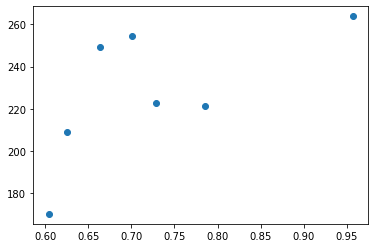

In [77]:
# зависимость x1 при малом возрасте и x2 при большом возрасте

print(f"Коэффициент корреляции Пирсона")
print(pearsonr(x11, x22[:len(x22) - 1]))
print()

for i in range(len(compute_distances)):
    stat, pvalue, _ = MGC(compute_distance=compute_distances[i]).test(np.array(x11),
                                                                      np.array(x22[:len(x22) - 1]),
                                                                      workers=-1)
    
    print(f"Коэффициент корреляции MGC при расстоянии {compute_distances[i]}")
    print(stat, pvalue)
    print()

plt.plot(x11, x22[:len(x22) - 1], "o")
plt.show()

Можно сделать вывод, что зависимости нет